Fudhail M

IT-A 3122225002033

PRML Lab Ex1

Logistic Regression

Dataset used: Advertising sales dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
url = "/Users/fudhail/Downloads/advertising.csv"
advertising = pd.read_csv(url)

In [4]:
# Display first few rows
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [6]:
# Convert Sales into a binary variable (e.g., high sales vs. low sales)
median_sales = advertising['Sales'].median()
advertising['High_Sales'] = (advertising['Sales'] > median_sales).astype(int)

In [7]:
# Define features and target variable
X = advertising[['TV', 'Radio', 'Newspaper']]
y = advertising['High_Sales']

In [8]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [10]:
# Make predictions
y_pred = model.predict(X_test)

In [11]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [12]:
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.97
Confusion Matrix:
[[21  1]
 [ 0 18]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        22
           1       0.95      1.00      0.97        18

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



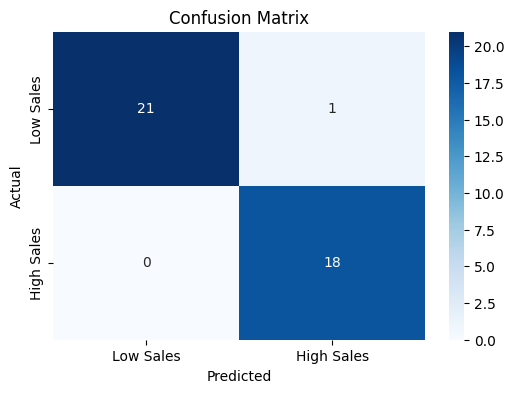

In [13]:
# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Sales', 'High Sales'], yticklabels=['Low Sales', 'High Sales'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()